In [1]:
#Load the libraries
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

In [2]:
#Importing the data
df_loan = pd.read_csv("loan.csv",low_memory=False)

In [3]:
#Looking the data
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Checking the Dimensions of our dataset

df_loan.shape

(39717, 111)

In [5]:
#checking columns
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Cleaning the data

In [6]:
#remove unneccsary columns - behavioral data
not_required_columns = ["delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","application_type"]
df_loan.drop(labels = not_required_columns,axis=1, inplace=True)
print("Now we have ",df_loan.shape ,"rows & columns.")

Now we have  (39717, 90) rows & columns.


In [9]:
#drop all columns with null values
nulls = pd.DataFrame(round(df_loan.isnull().sum()/len(df_loan.index)*100,2),columns=['null_percent'])
drop_cols = nulls[nulls['null_percent']>75.0].index
df_loan.drop(drop_cols, axis=1, inplace=True)

In [10]:
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'mths_since_last_delinq',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [11]:
df_loan.shape

(39717, 34)

In [12]:
#filter to find loan_status !=Current
df_filtered = df_loan[df_loan['loan_status'] != 'Current']

In [14]:
df_filtered['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [20]:
#drop all columns with 75% null values
import warnings
warnings.filterwarnings("ignore")

nulls = pd.DataFrame(round(df_filtered.isnull().sum()/len(df_filtered.index)*100,2),columns=['null_percent'])
drop_cols = nulls[nulls['null_percent']>75.0].index
df_filtered.drop(drop_cols, axis=1, inplace=True)

In [21]:
df_loan.shape

(39717, 34)

# EDA

## Univariate Analysis

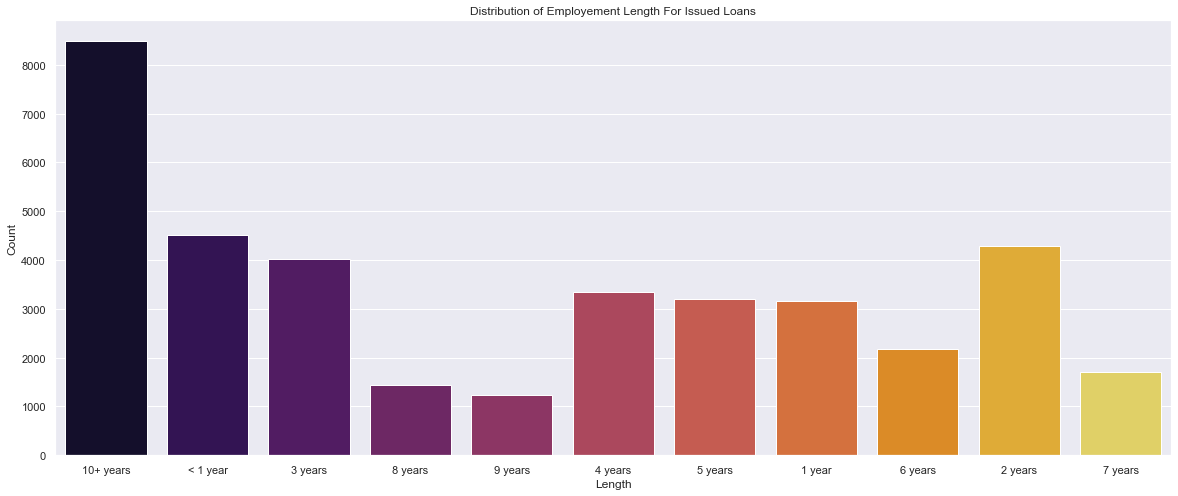

In [23]:
#distribution of loans per the employment length
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot(df_filtered['emp_length'],palette='inferno')
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Employement Length For Issued Loans")
plt.show()

## Insights
highest loans are taken by people with employment length >10 years

<AxesSubplot:xlabel='grade', ylabel='count'>

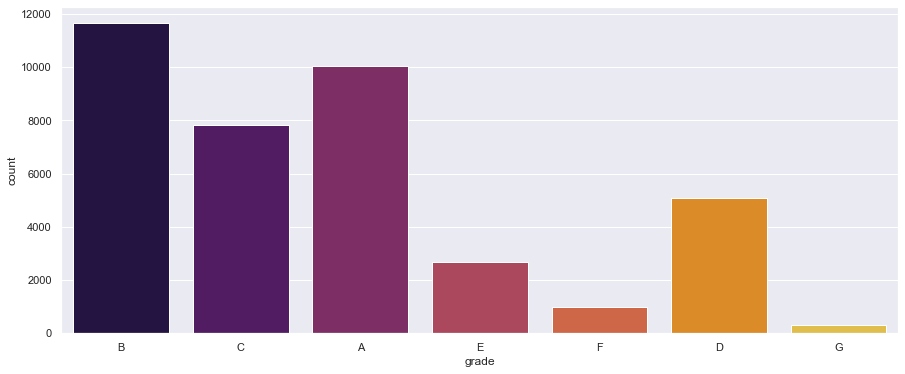

In [24]:
sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(df_filtered['grade'], palette='inferno')

## Insights - Majority of loans taken of Grade B

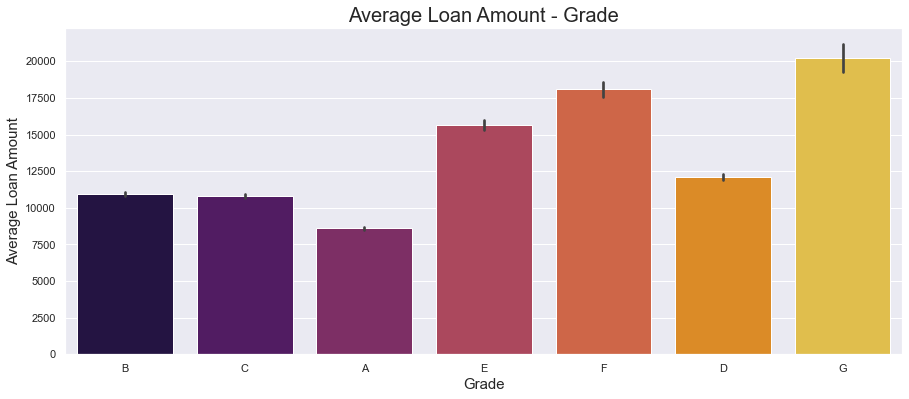

In [26]:
loan_grades = df_filtered.groupby("grade").mean().reset_index()

sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(x='grade', y='loan_amnt', data=df_filtered, palette='inferno')
plt.title("Average Loan Amount - Grade", fontsize=20)
plt.xlabel("Grade", fontsize=15)
plt.ylabel("Average Loan Amount", fontsize=15);

In [35]:
target = [1 if i=='Fully Paid' else 0 for i in df_filtered['loan_status']]
df_filtered['target'] = target
df_filtered['target'].value_counts()


1    32950
0     5627
Name: target, dtype: int64

In [31]:
df_filtered['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [36]:
def univariate(df,col,vartype,hue =None):    
    '''
    Univariate function will plot parameter values in graphs.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuous or categorical
                Continuous(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : Only applicable in categorical analysis.
    '''
    sns.set(style="darkgrid")
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
    plt.show()

## Loan Amount

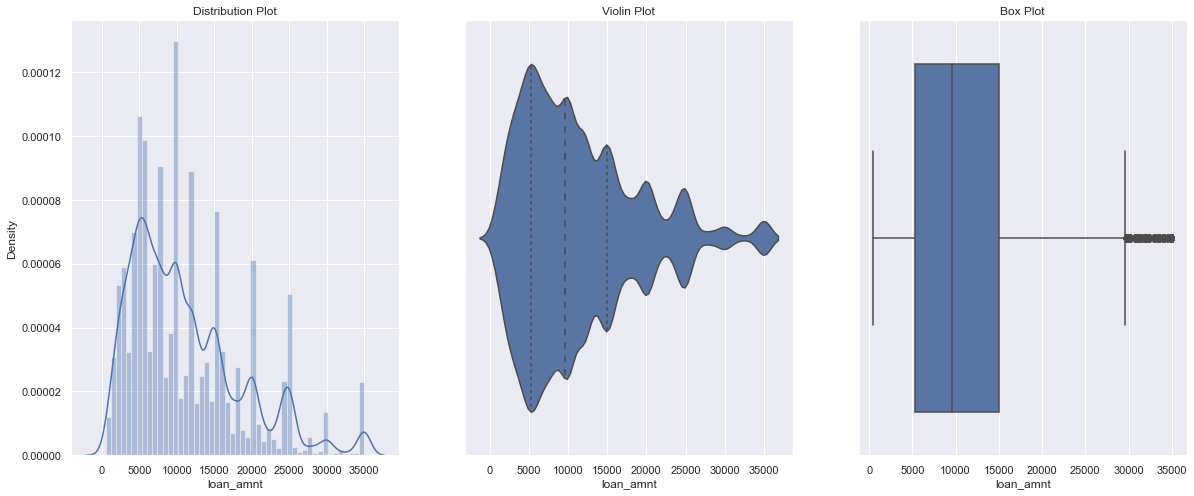

In [37]:
univariate(df=df_filtered,col='loan_amnt',vartype=0)

# Insights - Most of the loan lies in 6000-20000 range

## Interest rate

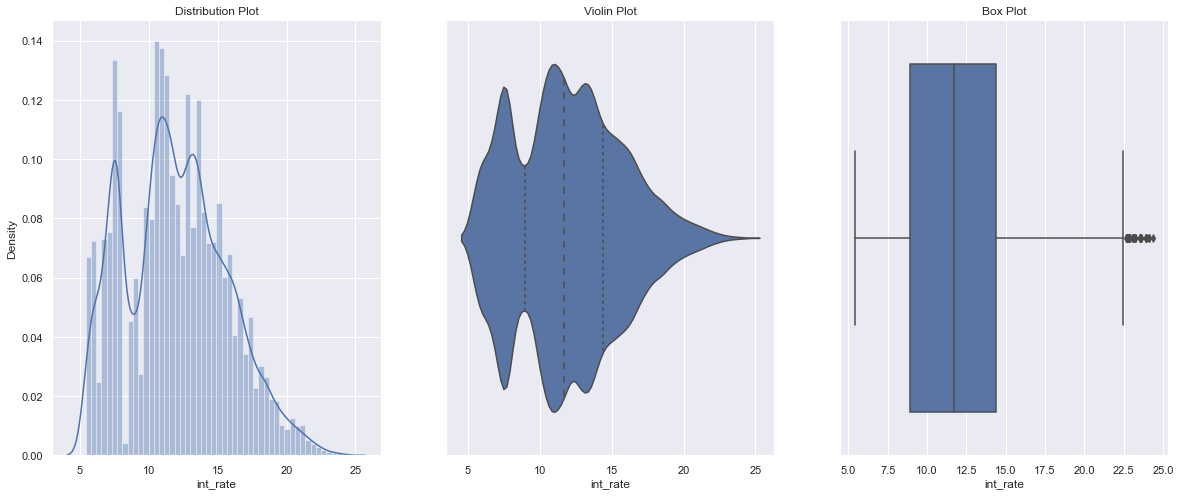

In [43]:
df_filtered['int_rate'] = df_filtered['int_rate'].replace("%","", regex=True).astype(float)
univariate(df=df_filtered,col='int_rate',vartype=0)

## Insights - Most of the loan interest range in 8-16%

## Annual Income 

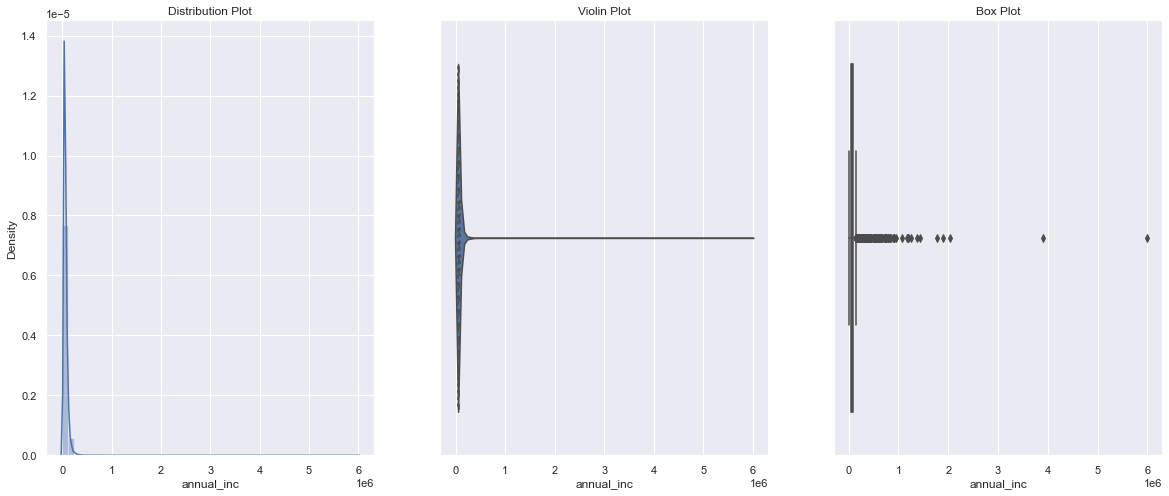

In [45]:
df_filtered['annual_inc'] = df_filtered['annual_inc'].replace("%","", regex=True).astype(float)
univariate(df=df_filtered,col='annual_inc',vartype=0)

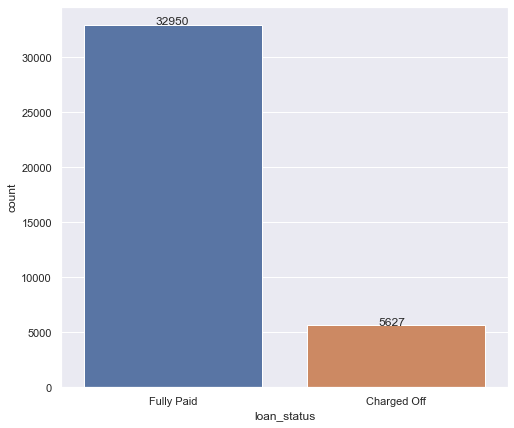

In [46]:
univariate(df=df_filtered,col='loan_status',vartype=1)

## Insights - Around 15% loans charged off

In [53]:
df_filtered.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

In [52]:
# Remove rows where home_ownership’==’OTHER’, ‘NONE’, ‘ANY’
rem = ['OTHER', 'NONE', 'ANY']
df_filtered.drop(df_filtered[df_filtered['home_ownership'].isin(rem)].index,inplace=True)
df_filtered.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

NameError: name 'loan' is not defined

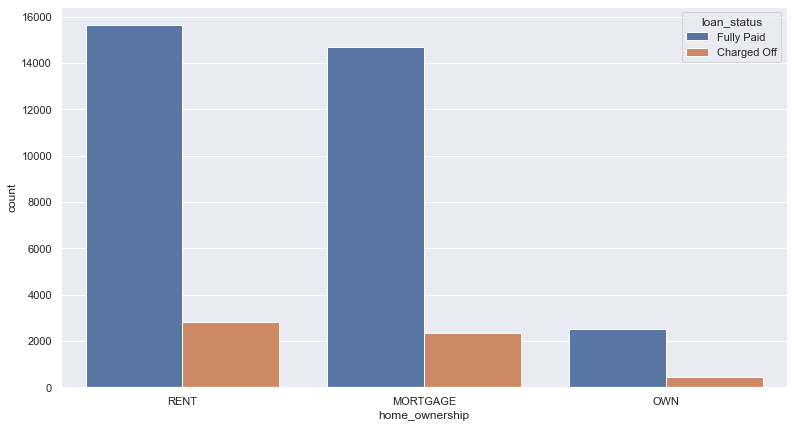

In [57]:
univariate(df=df_filtered,col='home_ownership',vartype=1,hue='loan_status')

## Insights - Loans with Rent and Home ownership is similar in terms if payment and charge off

# Multivariate Analysis

## Purpose of loan/Loan amount

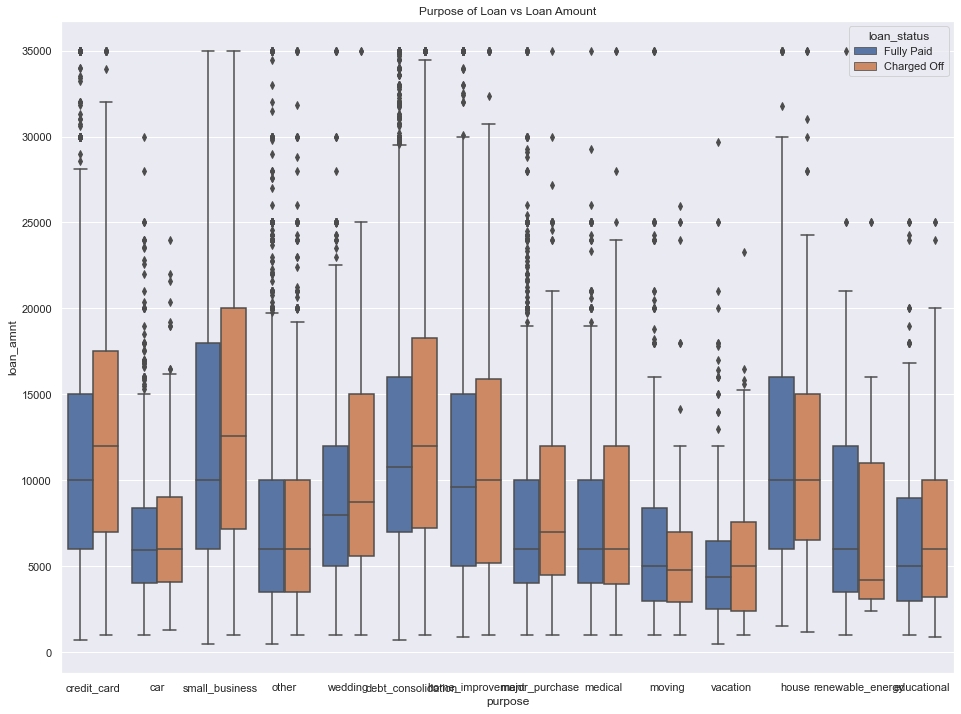

In [60]:
plt.figure(figsize=(16,12))
df_filtered['loan_amnt'] = df_filtered['loan_amnt'].astype('float')
sns.boxplot(data =df_filtered, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()